<h1 align=center><font size = 5>Bike share system investigation</font></h1>

## Introduction

This is the bike share system investigation

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Handling with data](#1)<br>
2. [Descriptive statistic](#2)<br>
3. [Model](#3) <br>


</div>
<hr>

# Content

1. Connect with db2 and first clean 
    * Clean the tripduration < =60s,>= 6 days and delect rows with empty tripduration 
    * Change the type on demand 
    * Get the year, month, week for statistic

2. Descriptive statistic
    * Change of the station number and  tripduration range
    * Change of the week and month
    * The popular trip 
    * The difference between customer and subscriber
    * The age range and gender

3. Model
    * Connect with Footsquare
    * Get the top 40 bike station lat,lon in Manhattan
    * Kmeans Cluster and 10 important categories(10 top features around docks)

In [1]:
import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import csv
import json # library to handle JSON files






# 1. Handling with data <a id="1"></a> 
      
      1. Clean the tripduration < 60s and delect rows with empty tripduration 
      2. Get the year, month, week for statistic 
      3. Change the type on demand


In [10]:
#import data from local 

In [9]:
data = pd.concat([data_2016,data_2017,data_2018,data_2019])

In [11]:
data.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour
0,923,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01,00:00:41,2016-01-01,00:16:04
1,379,476.0,E 31 St & 3 Ave,40.743943,-73.979661,498.0,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01,00:00:45,2016-01-01,00:07:04
2,589,489.0,10 Ave & W 28 St,40.750664,-74.001768,284.0,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01,00:00:48,2016-01-01,00:10:37
3,889,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01,00:01:06,2016-01-01,00:15:56
4,1480,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01,00:01:12,2016-01-01,00:25:52


In [12]:
#drop the invalid data
data.drop(data[data['tripduration'] <=60].index,inplace=True)
data.drop(data[pd.isna(data['tripduration'])].index,inplace=True)

In [13]:
print('The number of data is : {}'.format(len(data)))

The number of data is : 68310348


In [14]:
# check the extreme tripduration, large than 3 days.
data_extreme = data[data['tripduration']>=(60*60*24*3)]

In [15]:
print('The number of extreme larger data is : {}'.format(len(data_extreme)))
print('The ratio of extreme larger data in all the data is : {}'.format(len(data_extreme)/len(data)))

The number of extreme larger data is : 7442
The ratio of extreme larger data in all the data is : 0.00010894396263359689


In [19]:
# investigate the extreme data
df_extreme_user = data_extreme[['tripduration', 'usertype']].groupby(['usertype']).agg(['mean', 'count'])
df_extreme_user.head()

tripduration      
                     mean count
usertype                       
Customer    936773.166125  4617
Subscriber  796987.124424  2821

In [20]:
# Customer is the large proproration of the extreme data. 
data_extreme_1 = data[data['tripduration']>=(60*60*24*3*2)]
df_extreme_user_1 = data_extreme_1[['tripduration', 'usertype']].groupby(['usertype']).agg(['mean', 'count'])
df_extreme_user_1.head()

tripduration      
                    mean count
usertype                      
Customer    1.394345e+06  2563
Subscriber  1.246295e+06  1391

### Delete the data with triduration over 6 days. Because the extreme data over 6 days is also large. so Continue using shared-bike over 6 days once is not so usual.

In [21]:
data.drop(data[data['tripduration'] >=60*60*24*3*2].index,inplace=True)


In [22]:
print('The total number of data is : {}'.format(len(data)))

The total number of data is : 68295312


In [14]:
data.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour
0,923,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1,2016-01-01,00:00:41,2016-01-01,00:16:04
1,379,476.0,E 31 St & 3 Ave,40.743943,-73.979661,498.0,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1,2016-01-01,00:00:45,2016-01-01,00:07:04
2,589,489.0,10 Ave & W 28 St,40.750664,-74.001768,284.0,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982,2,2016-01-01,00:00:48,2016-01-01,00:10:37
3,889,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961,2,2016-01-01,00:01:06,2016-01-01,00:15:56
4,1480,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952,1,2016-01-01,00:01:12,2016-01-01,00:25:52


#### Change the type

In [30]:
#fill NaN to 9999 and float to int
data['birth year'].fillna(9999, inplace=True)
data['birth year'] = [int(i) for i in list(data['birth year'])]


In [31]:
# fill NaN with 0 and float to str
data['start station id'].fillna(0, inplace=True)
data['end station id'].fillna(0, inplace=True)
data['start station id'] = [str(int(i)) for i in list(data['start station id'])]
data['end station id'] = [str(int(i)) for i in list(data['end station id'])]

In [32]:
# fill NaN with 100 and to str
data['gender'].fillna(100, inplace=True)
data['gender'] = [str(int(i)) for i in list(data['gender'])]

In [33]:
# datetime
from datetime import datetime
data['sdate'] = data['sdate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
data['year'] = [i.year for i in list(data['sdate'])]
data['month'] = [i.month for i in list(data['sdate'])]
data['weekday'] = [i.weekday() for i in list(data['sdate'])]

In [34]:
data.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday
0,923,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1,2016-01-01,00:00:41,2016-01-01,00:16:04,2016,1,4
1,379,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1,2016-01-01,00:00:45,2016-01-01,00:07:04,2016,1,4
2,589,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982,2,2016-01-01,00:00:48,2016-01-01,00:10:37,2016,1,4
3,889,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961,2,2016-01-01,00:01:06,2016-01-01,00:15:56,2016,1,4
4,1480,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952,1,2016-01-01,00:01:12,2016-01-01,00:25:52,2016,1,4


In [35]:
data.drop(data[pd.isna(data['start station name'])].index,inplace=True)
data.drop(data[pd.isna(data['end station name'])].index,inplace=True)


In [36]:
print('The total number of data is : {}'.format(len(data)))


The total number of data is : 68285015


In [37]:
max(data['tripduration'])
min(data['tripduration'])

61

In [38]:
data.head(2)

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday
0,923,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1,2016-01-01,00:00:41,2016-01-01,00:16:04,2016,1,4
1,379,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1,2016-01-01,00:00:45,2016-01-01,00:07:04,2016,1,4


# descriptive statstic and Visualization<a id="2"></a>


In [39]:
 
from geopy.geocoders import Nominatim 
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import calendar
import geopandas as gpd

In [40]:
# average time over year or year month 
df_Avg_duration_y = data[['tripduration','year']].groupby(['year']).mean()
print(df_Avg_duration_y)
df_Avg_duration_m = data[['tripduration','year','month']].groupby(['year','month']).mean()
print(df_Avg_duration_m)

      tripduration
year              
2016    920.402155
2017    900.277173
2018    887.814205
2019    906.895934
            tripduration
year month              
2016 1        820.671190
     2        844.672167
     3        964.167877
     4       1005.549360
     5       1024.272661
     6        957.760578
     7        944.606184
     8        937.715244
     9        935.299144
     10       877.526257
     11       843.900857
     12       748.361171
2017 1        738.382346
     2        789.448235
     3        766.615801
     4        949.772300
     5        925.881263
     6        955.892821
     7        992.123594
     8        980.389508
     9        948.845550
     10       889.193331
     11       809.721007
     12       729.220650
2018 1        716.826134
     2        742.076938
     3        766.185051
     4        877.079610
     5        966.203244
     6        982.982322
     7        967.283716
     8        931.052944
     9        923.446147
     10    

In [41]:
#reset the index
df_Avg_duration_m = df_Avg_duration_m.reset_index()

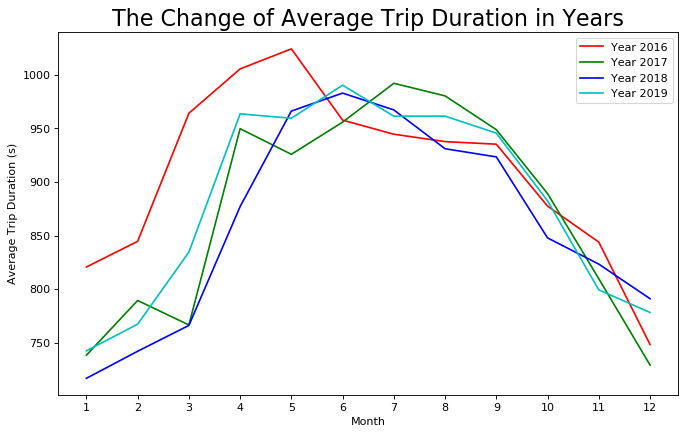

In [42]:
# plot linear line by year
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

xticks = [calendar.month_abbr[i] for i in list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2016]['month'])]
x = np.linspace(1,13,num=12, endpoint=False)
y_2016 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2016]['tripduration'])
y_2017 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2017]['tripduration'])
y_2018 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2018]['tripduration'])
y_2019 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2019]['tripduration'])
line1,= plt.plot(x, y_2016,'r',label='line1')
line2, = plt.plot(x, y_2017,color='green',label='line2')
line3, = plt.plot(x, y_2018,color = 'b',label='line3')
line4, = plt.plot(x, y_2019,color='c',label='line4')
plt.xticks(x)


plt.title('The Change of Average Trip Duration in Years',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (s)')
plt.legend([line1, line2, line3,line4], ['Year 2016', 'Year 2017', 'Year 2018','Year 2019'],loc='upper right')

plt.show()



In [43]:
#add a column for easy descriptive statistic
data['count'] = [1]*len(data)

In [44]:
# the number of station 
Num_2016 = len(data[data['year'] == 2016]['start station name'].unique())
Num_2017 = len(data[data['year'] == 2017]['start station name'].unique())
Num_2018 = len(data[data['year'] == 2018]['start station name'].unique())
Num_2019 = len(data[data['year'] == 2019]['start station name'].unique())
print(Num_2019,Num_2018,Num_2017,Num_2016)

938 821 819 654


In [45]:
# the use frequency
df_usage = data[['month','year','count']].groupby(['year','month']).sum()
print(df_usage.head())

              count
year month         
2016 1       509415
     2       560786
     3       919770
     4      1012938
     5      1211982


In [46]:
df_usage = df_usage.reset_index()
df_usage.head()

,year,month,count
0,2016,1,509415
1,2016,2,560786
2,2016,3,919770
3,2016,4,1012938
4,2016,5,1211982


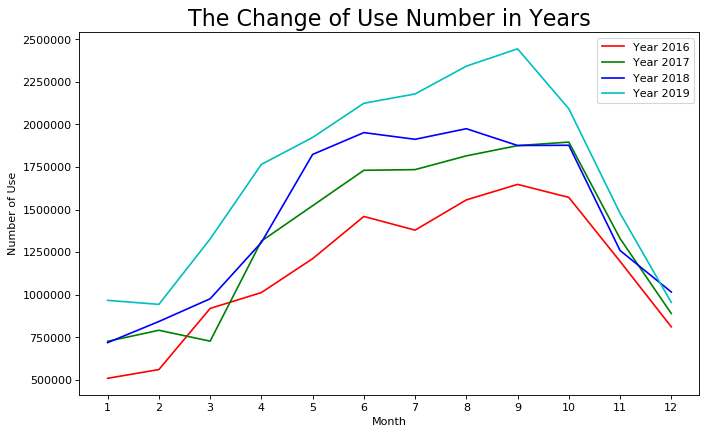

In [47]:
# plot linear line by year about the use count 
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')


x = np.linspace(1,13,num=12, endpoint=False)
y_2016 = list(df_usage[df_usage['year'] == 2016]['count'])
y_2017 = list(df_usage[df_usage['year'] == 2017]['count'])
y_2018 = list(df_usage[df_usage['year'] == 2018]['count'])
y_2019 = list(df_usage[df_usage['year'] == 2019]['count'])
line1, = plt.plot(x, y_2016,'r',label='line1')
line2, = plt.plot(x, y_2017,color='green',label='line2')
line3, = plt.plot(x, y_2018,color = 'b',label='line3')
line4, = plt.plot(x, y_2019,color='c',label='line4')
plt.xticks(x)


plt.title('The Change of Use Number in Years',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Use')
plt.legend([line1, line2, line3,line4], ['Year 2016', 'Year 2017', 'Year 2018','Year 2019'],loc='upper right')

plt.show()

In [48]:
# gender and usertype with year, month
df_usage_gender = data[['month','year','count','gender','tripduration']].groupby(['year','month','gender']).agg(Avg_trip=pd.NamedAgg(column='tripduration', aggfunc=np.mean),Num_trip=pd.NamedAgg(column='count', aggfunc='count'))
df_usage_gender = df_usage_gender.reset_index()
print(df_usage_gender.head())
df_usage_user = data[['month','year','count','usertype','tripduration']].groupby(['year','month','usertype']).agg(Avg_trip=pd.NamedAgg(column='tripduration', aggfunc=np.mean),Num_trip=pd.NamedAgg(column='count', aggfunc='count'))
df_usage_user = df_usage_user.reset_index()
print(df_usage_user.head())



   year  month gender     Avg_trip  Num_trip
0  2016      1      0  2293.571434     25702
1  2016      1      1   712.650485    379268
2  2016      1      2   850.469788    104445
3  2016      2      0  2403.603123     31060
4  2016      2      1   720.653191    417157
   year  month    usertype     Avg_trip  Num_trip
0  2016      1    Customer  2370.038715     24538
1  2016      1  Subscriber   742.262891    484877
2  2016      2    Customer  2476.256658     29814
3  2016      2  Subscriber   753.058937    530972
4  2016      3    Customer  2306.372720     93212


In [49]:
df_usage_gender.head()

,year,month,gender,Avg_trip,Num_trip
0,2016,1,0,2293.571434,25702
1,2016,1,1,712.650485,379268
2,2016,1,2,850.469788,104445
3,2016,2,0,2403.603123,31060
4,2016,2,1,720.653191,417157


In [50]:
# usertype and weekday
df_weekday_user = data[['weekday','count','usertype','tripduration']].groupby(['weekday','usertype']).agg(Avg_trip=pd.NamedAgg(column='tripduration', aggfunc=np.mean),Num_trip=pd.NamedAgg(column='count', aggfunc='sum'))
print(df_weekday_user.head())


                       Avg_trip  Num_trip
weekday usertype                         
0       Customer    1801.275860    936037
        Subscriber   758.930086   8794716
1       Customer    1795.220532    807947
        Subscriber   755.365300   9610452
2       Customer    1806.294312    823455


In [51]:
#2019 dat
data_2019 = data[data['year']==2019]
data_2019.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday,count
0,320,3160,Central Park West & W 76 St,40.778968,-73.973747,3283,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,2019-01-01,00:01:47,2019-01-01,00:07:07,2019,1,1,1
1,316,519,Pershing Square North,40.751873,-73.977706,518,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,2019-01-01,00:04:43,2019-01-01,00:10:00,2019,1,1,1
2,591,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,2019-01-01,00:06:03,2019-01-01,00:15:55,2019,1,1,1
3,2719,504,1 Ave & E 16 St,40.732219,-73.981656,3709,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,2019-01-01,00:07:03,2019-01-01,00:52:22,2019,1,1,1
4,303,229,Great Jones St,40.727434,-73.993790,503,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,2019-01-01,00:07:35,2019-01-01,00:12:39,2019,1,1,1


In [52]:
data_2019[['tripduration']].describe()


,tripduration
count,2.054506e+07
mean,9.068959e+02
std,3.799094e+03
min,6.100000e+01
25%,3.620000e+02
50%,6.150000e+02
75%,1.079000e+03
max,5.180170e+05


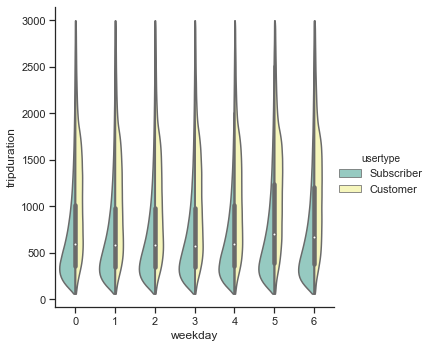

In [53]:
#violin shape plot to see the comparasion of usertype ,consider the extreme value
sns.set(style="ticks")

sns.catplot(x="weekday", y="tripduration", hue="usertype",kind="violin", split=True, data=data_2019[data_2019['tripduration']<3000],cut=0,palette="Set3");

In [54]:
data_2019['location'] = data_2019['start station latitude'].astype(str)+','+data_2019['start station longitude'].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
## because the services has limit ,so get the unique location information
location_unique = list(data_2019['location'].unique())

In [74]:
# get borough of bike station 
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='NY')
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

borough = []

for loc in location_unique_1:
    sub = str(geolocator.reverse(loc))
    borough.append(sub.split(', ')[2])

borough

['Bushwick',
 'Bushwick',
 'Bushwick',
 'Bushwick',
 'Ocean Hill',
 'Ridgewood',
 'Ocean Hill',
 'Macon Street',
 'Broadway',
 'Bushwick',
 'Ocean Hill',
 'Bushwick',
 'Bushwick',
 'Bushwick',
 'Bushwick',
 'Bushwick',
 'Bushwick',
 'Broadway Junction',
 'Madison Avenue',
 'Lower East Side',
 'Broadway Junction',
 'Ocean Hill',
 'Cobble Hill Historic District',
 'Broadway Junction',
 'New York',
 'Midtown East',
 'Ridgewood',
 'Ridgewood',
 'Ridgewood',
 'Ridgewood',
 'Sunnyside',
 'Ridgewood',
 'Greenpoint',
 'Ridgewood',
 'Lenox Hill',
 'Ridgewood',
 'Greenpoint',
 'Ridgewood',
 'Ridgewood',
 'Ridgewood',
 'Ridgewood',
 'Broadway Junction',
 'Ridgewood',
 'Ridgewood',
 'Manhattan Community Board 1',
 'Ridgewood',
 'Ridgewood',
 'Ridgewood',
 'Bushwick',
 'Greenpoint',
 'Madison Street',
 'Ridgewood',
 'Bushwick',
 'West Village',
 'Rockefeller Plaza',
 'East Village',
 'Ridgewood',
 'Ridgewood',
 'Boerum Hill',
 'DUMBO',
 'West 33rd Street',
 'Hudson Yards',
 'Columbus Circle',
 '6th

In [77]:
NY_borough = borough

In [80]:
df_loc_borough = pd.DataFrame({'location':location_unique,'borough':NY_borough})
df_loc_borough.head()

,location,borough
0,"40.77896784,-73.97374737",Central Park West
1,"40.751872999999996,-73.97770600000003",Murray Hill
2,"40.78524672,-73.97667321",Upper West Side
3,"40.73221853,-73.98165557",Stuy Town
4,"40.72743423,-73.99379025",NoHo


In [113]:
data_2019.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday,count,location,borough
0,320.0,3160,Central Park West & W 76 St,40.778968,-73.973747,3283,W 89 St & Columbus Ave,40.788221,-73.970416,15839.0,Subscriber,1971.0,1,2019-01-01,00:01:47,2019-01-01,00:07:07,2019.0,1.0,1.0,1.0,"40.77896784,-73.97374737",
1,316.0,519,Pershing Square North,40.751873,-73.977706,518,E 39 St & 2 Ave,40.747804,-73.973442,32723.0,Subscriber,1964.0,1,2019-01-01,00:04:43,2019-01-01,00:10:00,2019.0,1.0,1.0,1.0,"40.751872999999996,-73.97770600000003",
2,591.0,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154,E 77 St & 3 Ave,40.773142,-73.958562,27451.0,Subscriber,1987.0,1,2019-01-01,00:06:03,2019-01-01,00:15:55,2019.0,1.0,1.0,1.0,"40.78524672,-73.97667321",
3,2719.0,504,1 Ave & E 16 St,40.732219,-73.981656,3709,W 15 St & 6 Ave,40.738046,-73.996430,21579.0,Subscriber,1990.0,1,2019-01-01,00:07:03,2019-01-01,00:52:22,2019.0,1.0,1.0,1.0,"40.73221853,-73.98165557",
4,303.0,229,Great Jones St,40.727434,-73.993790,503,E 20 St & Park Ave,40.738274,-73.987520,35379.0,Subscriber,1979.0,1,2019-01-01,00:07:35,2019-01-01,00:12:39,2019.0,1.0,1.0,1.0,"40.72743423,-73.99379025",


In [93]:
df_loc_borough_manhatten = df_loc_borough[df_loc_borough['borough']=='Manhattan']
df_loc_borough_manhatten.reset_index(inplace = True)

In [107]:
data_2019['borough'] = ['']*len(data_2019)
for i,location in enumerate(df_loc_borough_manhatten['location']):
    for j,location_1 in enumerate(data_2019['location']):
        if location_1 == location:
            data_2019.loc[j,'borough'] = df_loc_borough_manhatten.loc[i,'borough']
            

In [105]:
data_manhattan = data_2019[data_2019['borough']=='Manhattan']
data_manhattan.reset_index(inplace = True)
data_manhattan.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,index,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday,count
0,40,812,518,E 39 St & 2 Ave,40.747804,-73.973442,433,E 13 St & Avenue A,40.729554,-73.980572,14785,Subscriber,1977,1,2016-01-01,00:14:48,2016-01-01,00:28:21,2016,1,4,1
1,228,1718,3176,W 64 St & West End Ave,40.774528,-73.987538,3140,1 Ave & E 78 St,40.771404,-73.953517,22423,Subscriber,1959,1,2016-01-01,00:45:51,2016-01-01,01:14:29,2016,1,4,1
2,2181,681,422,W 59 St & 10 Ave,40.770513,-73.988038,490,8 Ave & W 33 St,40.751551,-73.993934,19440,Subscriber,1993,1,2016-01-01,10:34:40,2016-01-01,10:46:02,2016,1,4,1
3,2435,241,3085,Roebling St & N 4 St,40.714690,-73.957390,3086,Graham Ave & Conselyea St,40.715143,-73.944507,22971,Subscriber,1982,1,2016-01-01,11:00:33,2016-01-01,11:04:34,2016,1,4,1
4,4119,934,167,E 39 St & 3 Ave,40.748901,-73.976049,237,E 11 St & 2 Ave,40.730473,-73.986724,17843,Subscriber,1947,1,2016-01-01,13:06:08,2016-01-01,13:21:43,2016,1,4,1


In [114]:
data_2019.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday,count,location,borough
0,320.0,3160,Central Park West & W 76 St,40.778968,-73.973747,3283,W 89 St & Columbus Ave,40.788221,-73.970416,15839.0,Subscriber,1971.0,1,2019-01-01,00:01:47,2019-01-01,00:07:07,2019.0,1.0,1.0,1.0,"40.77896784,-73.97374737",
1,316.0,519,Pershing Square North,40.751873,-73.977706,518,E 39 St & 2 Ave,40.747804,-73.973442,32723.0,Subscriber,1964.0,1,2019-01-01,00:04:43,2019-01-01,00:10:00,2019.0,1.0,1.0,1.0,"40.751872999999996,-73.97770600000003",
2,591.0,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154,E 77 St & 3 Ave,40.773142,-73.958562,27451.0,Subscriber,1987.0,1,2019-01-01,00:06:03,2019-01-01,00:15:55,2019.0,1.0,1.0,1.0,"40.78524672,-73.97667321",
3,2719.0,504,1 Ave & E 16 St,40.732219,-73.981656,3709,W 15 St & 6 Ave,40.738046,-73.996430,21579.0,Subscriber,1990.0,1,2019-01-01,00:07:03,2019-01-01,00:52:22,2019.0,1.0,1.0,1.0,"40.73221853,-73.98165557",
4,303.0,229,Great Jones St,40.727434,-73.993790,503,E 20 St & Park Ave,40.738274,-73.987520,35379.0,Subscriber,1979.0,1,2019-01-01,00:07:35,2019-01-01,00:12:39,2019.0,1.0,1.0,1.0,"40.72743423,-73.99379025",


In [162]:
#groupby location
df_2019_spot = data_2019[['start station name','count']].groupby(['start station name']).sum()
df_2019_spot.sort_values(by='count', ascending=False)

,count
start station name,
Pershing Square North,156548.0
E 17 St & Broadway,121745.0
8 Ave & W 31 St,119936.0
Broadway & E 22 St,113105.0
Broadway & E 14 St,112981.0
W 21 St & 6 Ave,110268.0
West St & Chambers St,105597.0
Broadway & W 60 St,103137.0
Christopher St & Greenwich St,101391.0


In [115]:
#groupby location
df_2019 = data_2019[['location','count']].groupby(['location']).sum()
df_2019 = df_2019.reset_index()           
            
  
    

In [116]:
# give the borough name with help of location information
for i,j in zip(location_unique,NY_borough):
    for index,loc in enumerate(df_2019['location']):
        if i == loc:
            df_2019.loc[index,'borough'] = j

In [117]:
# count number of station in a borough and sorted the station number
df_borough_sum = df_2019[['count','borough']].groupby(['borough']).sum()
df_borough_sum = df_borough_sum.reset_index()

In [118]:
df_borough_sum = df_borough_sum.sort_values(by='count', ascending=False).reset_index(drop=True)
df_borough_sum

,borough,count
0,Chelsea,1446117.0
1,East Village,755958.0
2,Manhattan,645625.0
3,Upper West Side,610171.0
4,Greenpoint,580149.0
5,Lower East Side,499433.0
6,Williamsburg,493321.0
7,West Village,472417.0
8,Murray Hill,464723.0
9,Greenwich Village,452686.0


In [120]:
# get the lat ,lon of borough 
geolocator = Nominatim(user_agent="NY_borough")


geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_borough_lat_lon = df_borough_sum['borough'].apply(geocode)

In [121]:
#rearrange the type
df_lat_lon = df_borough_lat_lon.apply(lambda location: [location.latitude, location.longitude])

In [122]:
df_lat_lon

0                      [51.4875417, -0.1682205]
1                     [40.7292688, -73.9873613]
2                     [40.7896239, -73.9598939]
3                     [40.7870455, -73.9754163]
4                     [40.7237134, -73.9509714]
5                     [40.7159357, -73.9868057]
6             [37.27892105, -76.69448606443117]
7                       [40.7341857, -74.00558]
8                     [38.2903476, -85.5882941]
9                     [40.7335844, -74.0028172]
10                    [40.7644228, -73.9923918]
11                     [40.7076124, -74.009378]
12                    [40.7153802, -74.0093063]
13                    [40.7737016, -73.9641196]
14                    [40.7110166, -74.0169369]
15                    [40.7251022, -73.9795833]
16                    [40.7410722, -73.9896534]
17                    [40.7395463, -73.9770832]
18     [40.757280550000004, -73.98585503545917]
19                    [40.7598219, -73.9724708]
20                    [40.6701033, -73.9

In [123]:
#plot the geo map with the number of station
from folium import plugins
NY_location = [40.730610,-73.935242]
# let's start again with a clean copy of the map of New York
ny_map = folium.Map(location = NY_location, zoom_start = 14,title = 'Mapbox Bright')

#station density layers
station_density = plugins.MarkerCluster().add_to(ny_map)

# loop through the dataframe and add each data point to the mark cluster
for location, label, in zip(df_lat_lon, df_borough_sum['count']):
    folium.CircleMarker(
        location=location,
        icon=None,
        popup=label,
        radius= label/10000,
        color="#007849",
    ).add_to(station_density)

# display map
ny_map

In [124]:
#the first ten trip in 2019
df_popular_trip = data_2019[['start station name','end station name','count']].groupby(['start station name','end station name']).sum().reset_index().sort_values(by='count', ascending=False).reset_index(drop=True)

In [125]:
df_popular_trip.head(10)

,start station name,end station name,count
0,E 7 St & Avenue A,Cooper Square & Astor Pl,8424.0
1,Central Park S & 6 Ave,Central Park S & 6 Ave,6776.0
2,Central Park S & 6 Ave,5 Ave & E 88 St,6091.0
3,North Moore St & Greenwich St,Vesey Pl & River Terrace,5364.0
4,West Drive & Prospect Park West,West Drive & Prospect Park West,5362.0
5,Vesey Pl & River Terrace,North Moore St & Greenwich St,5274.0
6,12 Ave & W 40 St,West St & Chambers St,5054.0
7,Pershing Square North,E 24 St & Park Ave S,5051.0
8,McGuinness Blvd & Eagle St,Vernon Blvd & 50 Ave,4999.0
9,Soissons Landing,Soissons Landing,4967.0


# The Segment analysis <a id="3"></a>

### Because Manhattan has the famous station ,so investigate the top endstation nearby information

In [126]:

df_2019.head()

,location,count,borough
0,"40.65539977447831,-74.01062786579129",2841.0,Sunset Park
1,"40.65708866668485,-74.00870203971863",5345.0,Industry City
2,"40.6610633719006,-73.97945255041121",32241.0,Park Slope
3,"40.6627059,-73.9569115",3257.0,Crown Heights
4,"40.6630619,-73.95387459999998",5471.0,Flatbush


In [127]:
# get the top 40 bike docks
df_top_40 = df_2019[df_2019['borough'] == 'Manhattan'].sort_values(by='count', ascending=False).head(40)

In [128]:
df_top_40 = df_top_40.reset_index(drop= True)

In [129]:
# give the address of bike station
geolocator = Nominatim(user_agent='NY_address')
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

address = []

for loc in df_top_40['location']:
    sub = str(geolocator.reverse(loc))
    address.append(sub.split(', ')[0]+sub.split(', ')[1])

In [130]:
df_top_40['address'] = address

In [159]:
# connect with foursquare
import requests
LIMIT = 100
CLIENT_ID = '' # Foursquare ID
CLIENT_SECRET = '' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [136]:
def getNearbyVenues(names, latitudes, longitudes, radius=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Bike Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [137]:
df_top_40['latitude'] = df_top_40['location'].apply(lambda x: x.split(',')[0])
df_top_40['longtide'] = df_top_40['location'].apply(lambda x: x.split(',')[1])
df_top_40

,location,count,borough,address,latitude,longtide
0,"40.76590936,-73.97634151",75558.0,Manhattan,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151
1,"40.73726186,-73.99238967",67414.0,Manhattan,Citi Bike - E 16 St & 5 AveEast 16th Street,40.73726186,-73.99238967
2,"40.74322681432173,-73.97449783980845",65484.0,Manhattan,East 33 StreetKips Bay,40.74322681432173,-73.97449783980845
3,"40.73492695,-73.99200509",46996.0,Manhattan,128University Place,40.73492695,-73.99200509
4,"40.72430527250332,-73.99600982666016",39936.0,Manhattan,Lafayette StreetLittle Italy,40.72430527250332,-73.99600982666016
5,"40.75001986,-73.96905301",37015.0,Manhattan,Citi Bike - 1 Ave & E 44 St1st Avenue Tunnel,40.75001986,-73.96905301
6,"40.77515953434235,-73.98918695747851",34058.0,Manhattan,Thelonius Monk CircleUpper West Side,40.77515953434235,-73.98918695747851
7,"40.8045555,-73.93968609999997",28910.0,Manhattan,Harlem-125th StreetPark Avenue,40.8045555,-73.93968609999997
8,"40.792255299999994,-73.95249933",24903.0,Manhattan,12195th Avenue,40.792255299999994,-73.95249933
9,"40.734814,-73.992085",24470.0,Manhattan,126University Place,40.734814,-73.992085


In [138]:
manhattan_venues = getNearbyVenues(names=df_top_40['address'],
                                   latitudes=df_top_40['latitude'],
                                   longitudes=df_top_40['longtide']
                                  )



Citi Bike - Central Park S & 6 AveCenter Drive
Citi Bike - E 16 St & 5 AveEast 16th Street
East 33 StreetKips Bay
128University Place
Lafayette StreetLittle Italy
Citi Bike - 1 Ave & E 44 St1st Avenue Tunnel
Thelonius Monk CircleUpper West Side
Harlem-125th StreetPark Avenue
12195th Avenue
126University Place
400East 102nd Street
299Pleasant Avenue
380Malcolm X Boulevard
429East 89th Street
446East 85th Street
Riverside DriveUpper West Side
125th StreetWest 126th Street
201East 85th Street
P.S. 155 PlaygroundEast 118th Street
200East 118th Street
Adam Clayton Powell Jr. BoulevardHarlem
410East 106th Street
21East 118th Street
401East 114th Street
505East 120th Street
2037A5th Avenue
39East 128th Street
CitiBike Lexington Ave/E 120th StLexington Avenue
Citibike - Madison Avenue & East 120th StreetMadison Avenue
2120Lexington Avenue
111East 118th Street
Delancey StreetLower East Side
Delancey StreetLower East Side
Murray StreetBattery Park City
East Houston StreetLower East Side
Allen St

In [139]:
print(manhattan_venues.shape)
manhattan_venues.head()

(642, 7)


,Bike Station,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151,1 Hotel Central Park,40.765116,-73.976485,Hotel
1,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151,Quality Meats,40.765009,-73.976148,Steakhouse
2,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151,Exhale,40.766284,-73.977678,Spa
3,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151,Hallett Nature Sanctuary,40.767195,-73.975068,Nature Preserve
4,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151,Artists' Gate,40.765881,-73.976290,Park


In [140]:
manhattan_venues.groupby('Bike Station').count()

,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Bike Station,,,,,,
111East 118th Street,12,12,12,12,12,12
12195th Avenue,14,14,14,14,14,14
125th StreetWest 126th Street,35,35,35,35,35,35
126University Place,36,36,36,36,36,36
128University Place,36,36,36,36,36,36
200East 118th Street,27,27,27,27,27,27
201East 85th Street,46,46,46,46,46,46
2037A5th Avenue,19,19,19,19,19,19
2120Lexington Avenue,12,12,12,12,12,12


In [141]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 171 uniques categories.


In [142]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Bike Station'] = manhattan_venues['Bike Station'] 

# move Bike station column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Bike Station,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Big Box Store,Bike Shop,Bookstore,Boutique,Breakfast Spot,Bridge,Burger Joint,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,English Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Fish Market,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Travel,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nail Salon,Nature Preserve,New American Restaurant,Noodle House,North Indian Restaurant,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Perfume Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,River,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Citi Bike - Central Park S & 6 AveCenter Drive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Citi Bike - Central Park S & 6 AveCenter Drive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Citi Bike - Central Park S & 6 AveCenter Drive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Citi Bike - Central Park S & 6 AveCenter Drive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C

In [143]:
manhattan_onehot.shape

(642, 172)

In [144]:
manhattan_grouped = manhattan_onehot.groupby('Bike Station').mean().reset_index()
manhattan_grouped

,Bike Station,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Big Box Store,Bike Shop,Bookstore,Boutique,Breakfast Spot,Bridge,Burger Joint,Bus Station,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,English Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Fish Market,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Travel,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nail Salon,Nature Preserve,New American Restaurant,Noodle House,North Indian Restaurant,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Perfume Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,River,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,111East 118th Street,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.083333,0.000000,0.00000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000
1,12195th Avenue,0.000000,0.000000,0.0000

In [145]:
manhattan_grouped.shape

(35, 172)

In [146]:
num_top_venues = 5

for hood in manhattan_grouped['Bike Station']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Bike Station'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----111East 118th Street----
                venue  freq
0  Italian Restaurant  0.08
1                Café  0.08
2      Sandwich Place  0.08
3         Coffee Shop  0.08
4      Shipping Store  0.08


----12195th Avenue----
               venue  freq
0      Deli / Bodega  0.21
1               Café  0.21
2              Plaza  0.14
3           Fountain  0.14
4  Indian Restaurant  0.07


----125th StreetWest 126th Street----
                venue  freq
0  Miscellaneous Shop  0.06
1  Seafood Restaurant  0.06
2            Pharmacy  0.06
3                Bank  0.06
4          Shoe Store  0.06


----126University Place----
                  venue  freq
0           Coffee Shop  0.08
1     Outdoor Sculpture  0.06
2         Grocery Store  0.06
3  Gym / Fitness Center  0.06
4           Yoga Studio  0.06


----128University Place----
                  venue  freq
0           Coffee Shop  0.08
1           Pizza Place  0.06
2         Grocery Store  0.06
3  Gym / Fitness Center  0.06
4     Outdoor Scul

In [147]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [148]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Bike Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Bike Station'] = manhattan_grouped['Bike Station']

for ind in np.arange(manhattan_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

station_venues_sorted.head()

,Bike Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,111East 118th Street,Garden Center,Shipping Store,Coffee Shop,Sandwich Place,Moroccan Restaurant,Italian Restaurant,Clothing Store,Ice Cream Shop,Café,Wine Bar
1,12195th Avenue,Deli / Bodega,Café,Fountain,Plaza,Art Museum,Garden,History Museum,Indian Restaurant,Hobby Shop,Historic Site
2,125th StreetWest 126th Street,Shoe Store,Seafood Restaurant,Pharmacy,Bank,Miscellaneous Shop,Southern / Soul Food Restaurant,Sandwich Place,Cosmetics Shop,Deli / Bodega,Discount Store
3,126University Place,Coffee Shop,Yoga Studio,Steakhouse,Outdoor Sculpture,Grocery Store,Gym / Fitness Center,Comic Shop,Cosmetics Shop,Salad Place,Pizza Place
4,128University Place,Coffee Shop,Yoga Studio,Pizza Place,Steakhouse,Outdoor Sculpture,Grocery Store,Gym / Fitness Center,Comic Shop,Juice Bar,Salad Place


In [154]:

from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

manhattan_grouped_clustering = manhattan_grouped.drop('Bike Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [150]:
manhattan_merged = df_top_40
manhattan_merged.columns = ['location', 'count', 'borough', 'Bike Station', 'latitude', 'longtide']

In [151]:
# add clustering labels
station_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(station_venues_sorted.set_index('Bike Station'), on='Bike Station')

manhattan_merged.head() # check the last columns!

,location,count,borough,Bike Station,latitude,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"40.76590936,-73.97634151",75558.0,Manhattan,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151,2,Hotel,Park,American Restaurant,Spa,Steakhouse,Italian Restaurant,Outdoor Sculpture,Dog Run,Nature Preserve,Sandwich Place
1,"40.73726186,-73.99238967",67414.0,Manhattan,Citi Bike - E 16 St & 5 AveEast 16th Street,40.73726186,-73.99238967,2,Cosmetics Shop,Women's Store,Yoga Studio,Café,Candy Store,Salon / Barbershop,Salad Place,Chocolate Shop,Clothing Store,Playground
2,"40.74322681432173,-73.97449783980845",65484.0,Manhattan,East 33 StreetKips Bay,40.74322681432173,-73.97449783980845,2,Mexican Restaurant,Garden,Greek Restaurant,Pharmacy,Pizza Place,Convenience Store,College Cafeteria,Coffee Shop,Salad Place,Café
3,"40.73492695,-73.99200509",46996.0,Manhattan,128University Place,40.73492695,-73.99200509,2,Coffee Shop,Yoga Studio,Pizza Place,Steakhouse,Outdoor Sculpture,Grocery Store,Gym / Fitness Center,Comic Shop,Juice Bar,Salad Place
4,"40.72430527250332,-73.99600982666016",39936.0,Manhattan,Lafayette StreetLittle Italy,40.72430527250332,-73.99600982666016,2,Italian Restaurant,Coffee Shop,Café,Shoe Store,Gift Shop,Bookstore,Boutique,Outdoor Supply Store,French Restaurant,Pizza Place


In [152]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[40.758896, -73.985130], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['latitude'], manhattan_merged['longtide'], manhattan_merged['Bike Station'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Check the characters of bike station

In [155]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,count,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,5906.0,-73.93918199999997,0,Japanese Restaurant,Market,Yoga Studio,Farmers Market,Fried Chicken Joint,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish Market


In [156]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,count,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,5138.0,-73.942954,1,Dog Run,Yoga Studio,Farmers Market,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish Market


In [157]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,count,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75558.0,-73.97634151,2,Hotel,Park,American Restaurant,Spa,Steakhouse,Italian Restaurant,Outdoor Sculpture,Dog Run,Nature Preserve,Sandwich Place
1,67414.0,-73.99238967,2,Cosmetics Shop,Women's Store,Yoga Studio,Café,Candy Store,Salon / Barbershop,Salad Place,Chocolate Shop,Clothing Store,Playground
2,65484.0,-73.97449783980845,2,Mexican Restaurant,Garden,Greek Restaurant,Pharmacy,Pizza Place,Convenience Store,College Cafeteria,Coffee Shop,Salad Place,Café
3,46996.0,-73.99200509,2,Coffee Shop,Yoga Studio,Pizza Place,Steakhouse,Outdoor Sculpture,Grocery Store,Gym / Fitness Center,Comic Shop,Juice Bar,Salad Place
4,39936.0,-73.99600982666016,2,Italian Restaurant,Coffee Shop,Café,Shoe Store,Gift Shop,Bookstore,Boutique,Outdoor Supply Store,French Restaurant,Pizza Place
5,37015.0,-73.96905301,2,Park,Coffee Shop,Café,Tennis Court,Deli / Bodega,Hotel,Dog Run,Restaurant,Seafood Restaurant,Bridge
6,34058.0,-73.98918695747851,2,Gym / Fitness Center,Gym,Café,Wine Bar,Park,River,Dog Run,Grocery Store,English Restaurant,Food Truck
7,28910.0,-73.93968609999997,2,American Restaurant,Martial Arts Dojo,Japanese Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Market,Food & Drink Shop,Caribbean Restaurant,Fast Food Restaurant,Museum
8,24903.0,-73.95249933,2,Deli / Bodega,Café,Fountain,Plaza,Art Museum,Garden,History Museum,Indian Restaurant,Hobby Shop,Historic Site
9,24470.0,-73.992085,2,Coffee Shop,Yoga Studio,Steakhouse,Outdoor Sculpture,Grocery Store,Gym / Fitness Center,Comic Shop,Cosmetics Shop,Salad Place,Pizza Place


In [158]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,count,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,6539.0,-73.9311847,3,Hotel,Yoga Studio,Event Space,Fried Chicken Joint,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish Market,Fast Food Restaurant
